<a href="https://www.kaggle.com/code/gizemkoz/polynominalregression?scriptVersionId=261489669" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/polynomial-regression/Ice_cream selling data.csv


In [2]:
df = pd.read_csv("/kaggle/input/polynomial-regression/Ice_cream selling data.csv")

In [3]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


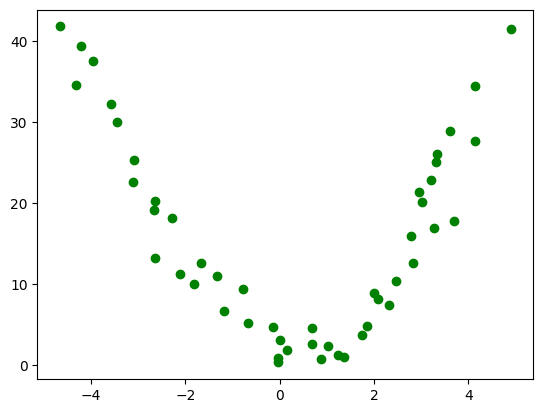

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df["Temperature (°C)"], df["Ice Cream Sales (units)"],color="g")

In [6]:
# dependent features --> y
# independent features --> X

X=df[["Temperature (°C)"]] #input
y=df[["Ice Cream Sales (units)"]] #output

In [7]:
X.head()

,Temperature (°C)
0,-4.662263
1,-4.316559
2,-4.213985
3,-3.949661
4,-3.578554


In [8]:
y.head()

,Ice Cream Sales (units)
0,41.842986
1,34.661120
2,39.383001
3,37.539845
4,32.284531


In [9]:
# train - test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15)

In [10]:
#scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [13]:
regression.fit(X_train, y_train)

LinearRegression()

In [14]:
# prediction
y_pred = regression.predict(X_test)

In [15]:
from sklearn.metrics import r2_score, mean_squared_error
score = r2_score(y_test, y_pred)
print(score)

0.005435931989663301


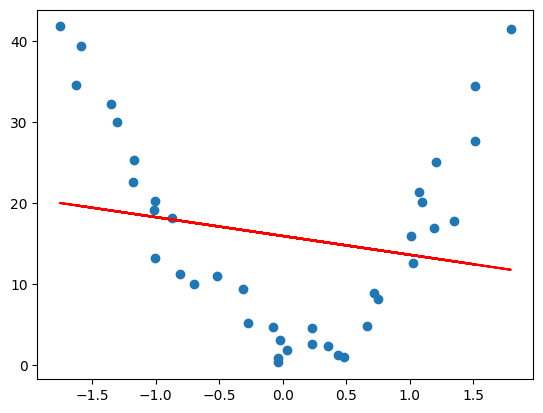

In [16]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train),color="r")
plt.show()

As the temperature increases, sales first decrease and then rise again - this pattern cannot be explained with a linear model. 

Therefore, in linear regression, the model can hardly explain the data at all.

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

def poly_regression(degree):
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("poly_features", PolynomialFeatures(degree=degree)),
        ("lin_reg", LinearRegression())
    ])

    pipeline.fit(X_train, y_train)

    score = pipeline.score(X_test, y_test)
    print(f"Degree={degree} -> R2 score: {score:.4f}")

    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)


    plt.scatter(X_train, y_train, color="blue", label="Training Points")
    plt.scatter(X_test, y_test, color="orange", label="Test Points")
    plt.plot(X_train, y_pred_train, "r.", label="Train Predictions")
    plt.plot(X_test, y_pred_test, "g.", label="Test Predictions")
    plt.title(f"Polynomial Regression (degree={degree})")
    plt.legend()
    plt.show()

    return pipeline

Degree=1 -> R2 score: 0.0054


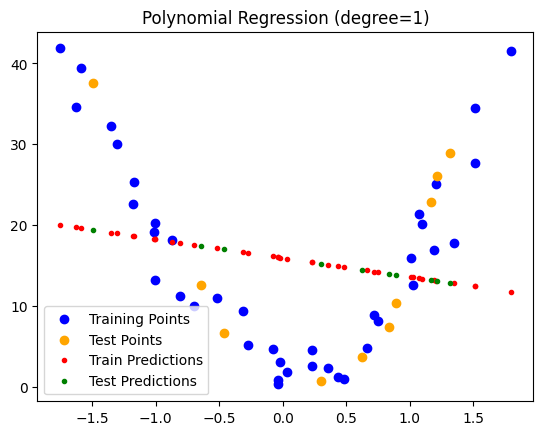

Degree=2 -> R2 score: 0.8947


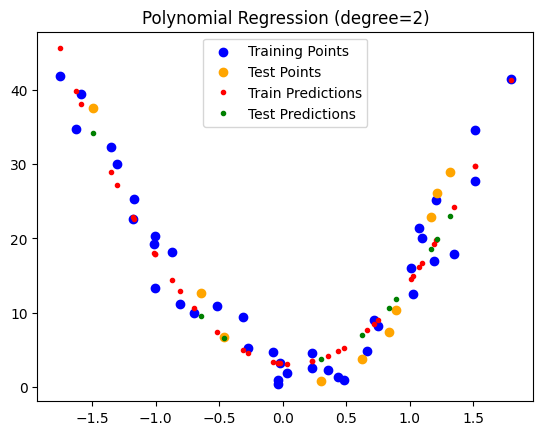

Degree=3 -> R2 score: 0.8983


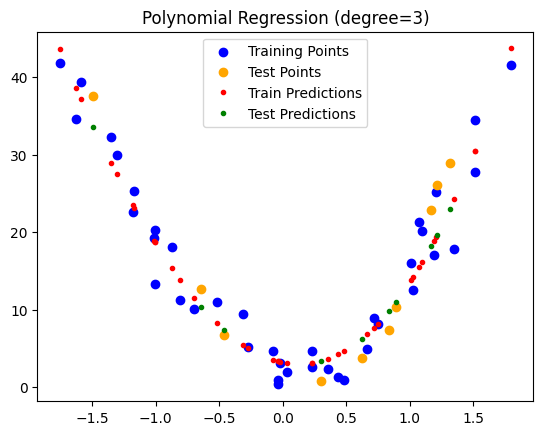

Degree=4 -> R2 score: 0.9182


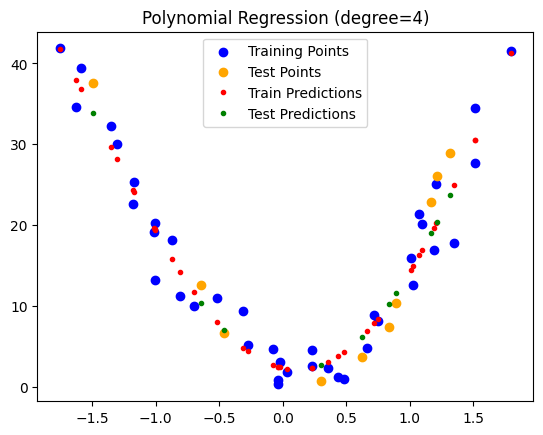

Degree=5 -> R2 score: 0.9216


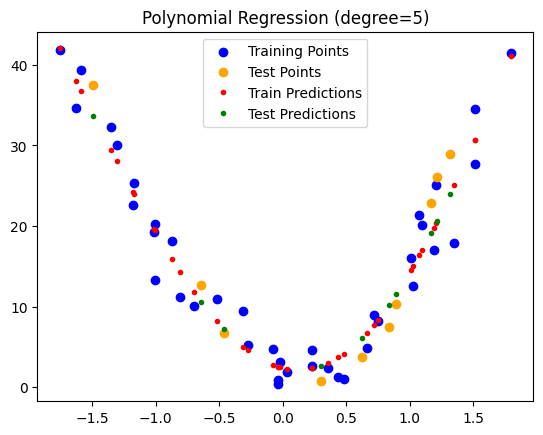

Degree=6 -> R2 score: 0.9243


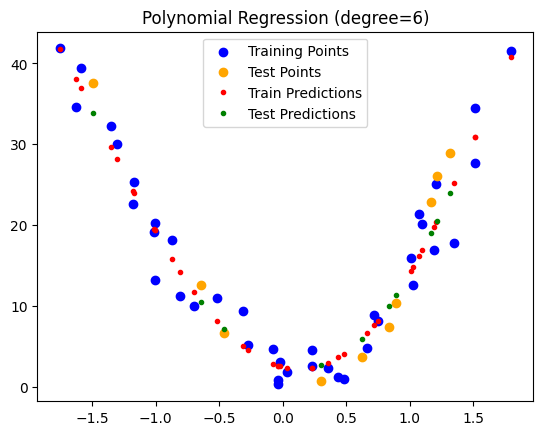

Degree=7 -> R2 score: 0.9395


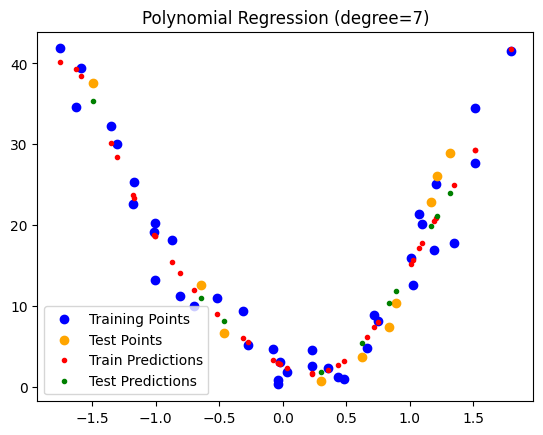

Degree=8 -> R2 score: 0.9446


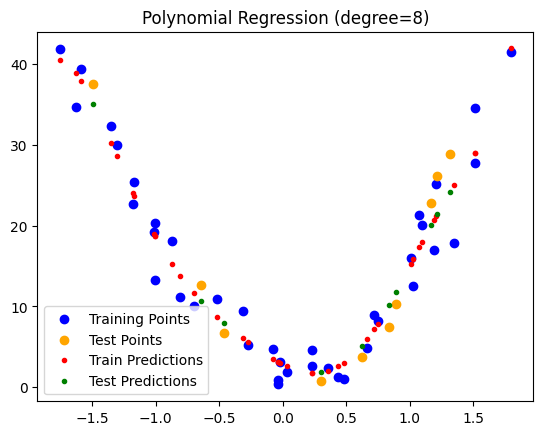

Degree=9 -> R2 score: 0.9058


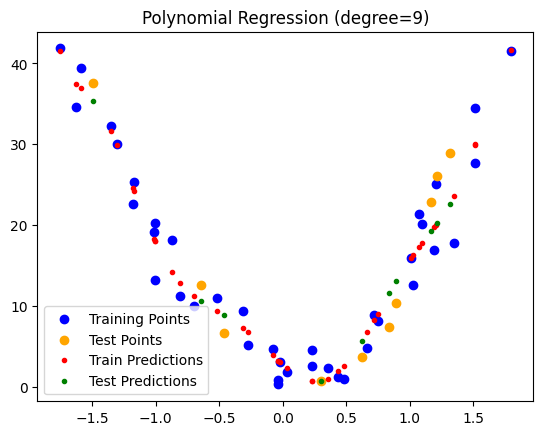

Degree=10 -> R2 score: 0.9016


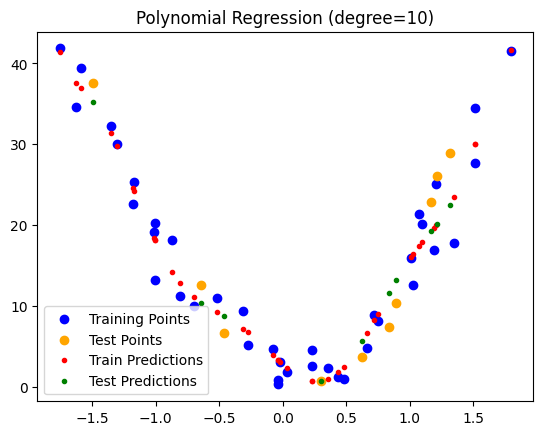

In [18]:
for degree in [1,2,3,4,5,6,7,8,9,10] :
    poly_regression(degree)

It first scales the data -> then generates polynomial features -> and finally learns the relationship using linear regression.

best model ->> degree=8 ->> R2 score: 0.9446